<a href="https://www.kaggle.com/code/gladyswahito/exploring-weather-data-probability-and-statistics?scriptVersionId=161161805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Australian Weather Analysis: Understanding Rain Patterns and Predicting Tomorrow's Weather


In this project, I aim to analyze the Australian weather dataset to understand rain patterns and predict tomorrow's weather. The dataset contains information on various weather parameters such as temperature, rainfall, wind speed, and more.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-in-australia/Australia Rainfall.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/weather-in-australia/Australia Rainfall.xlsx')
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11848 entries, 0 to 11847
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     11848 non-null  object 
 1   Station                   11848 non-null  object 
 2   Year                      11848 non-null  int64  
 3   Month                     11848 non-null  object 
 4   Date                      11846 non-null  float64
 5   Day                       11846 non-null  object 
 6   Min °C                    11736 non-null  float64
 7   Max °C                    11697 non-null  float64
 8   Rain(mm)                  11652 non-null  float64
 9   Evap (mm)                 2576 non-null   float64
 10  Sun(Hours)                2056 non-null   float64
 11  Max Wind gust Dir         10789 non-null  object 
 12  Max wind gust Spd - km/h  10789 non-null  float64
 13  Max wind gust-Time-local  10797 non-null  object 
 14  Temp °

In [3]:
# Summary statistics
print(df.describe())

               Year          Date        Min °C        Max °C      Rain(mm)  \
count  11848.000000  11846.000000  11736.000000  11697.000000  11652.000000   
mean    2019.420999     15.639288     12.542936     23.677208      1.898112   
std        0.493740      8.766227      7.072067      7.530543      7.955610   
min     2019.000000      1.000000     -5.900000      5.700000      0.000000   
25%     2019.000000      8.000000      7.500000     17.600000      0.000000   
50%     2019.000000     16.000000     12.000000     23.000000      0.000000   
75%     2020.000000     23.000000     17.500000     29.400000      0.200000   
max     2020.000000     31.000000     33.100000     48.900000    254.800000   

         Evap (mm)   Sun(Hours)  Max wind gust Spd - km/h  Temp °C- 9:00AM  \
count  2576.000000  2056.000000              10789.000000     11769.000000   
mean      6.015683     8.056907                 39.407174        17.423451   
std       3.593776     3.449648                 13.671

In [4]:
# Check for missing values
print(df.isnull().sum())

State                          0
Station                        0
Year                           0
Month                          0
Date                           2
Day                            2
Min °C                       112
Max °C                       151
Rain(mm)                     196
Evap (mm)                   9272
Sun(Hours)                  9792
Max Wind gust Dir           1059
Max wind gust Spd - km/h    1059
Max wind gust-Time-local    1051
Temp °C- 9:00AM               79
RH -% 9:00AM                  99
Cld 8th- 9:00 AM            5772
Dir - 9:00 AM - km/h          93
Spd - 9:00AM - km/h          945
MSLP- hPa - 9:00AM          1283
Temp °C- 3:00PM              867
RH -% 3:00PM                 881
Cld 8th- 3:00 PM            6529
Dir - 3:00 PM - km/h         878
Spd - 3:00PM - km/h          915
MSLP- hPa - 3:00PM          1287
Rain(Y/N)                      0
dtype: int64


In [5]:
# Handle missing values
df.dropna(inplace=True)

In [6]:
# Check for missing values
print(df.isnull().sum())

State                       0
Station                     0
Year                        0
Month                       0
Date                        0
Day                         0
Min °C                      0
Max °C                      0
Rain(mm)                    0
Evap (mm)                   0
Sun(Hours)                  0
Max Wind gust Dir           0
Max wind gust Spd - km/h    0
Max wind gust-Time-local    0
Temp °C- 9:00AM             0
RH -% 9:00AM                0
Cld 8th- 9:00 AM            0
Dir - 9:00 AM - km/h        0
Spd - 9:00AM - km/h         0
MSLP- hPa - 9:00AM          0
Temp °C- 3:00PM             0
RH -% 3:00PM                0
Cld 8th- 3:00 PM            0
Dir - 3:00 PM - km/h        0
Spd - 3:00PM - km/h         0
MSLP- hPa - 3:00PM          0
Rain(Y/N)                   0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


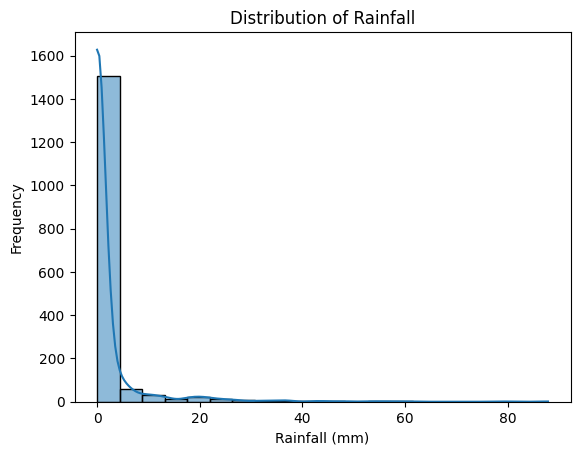

In [7]:
# Explore the distribution of numerical variables
sns.histplot(df['Rain(mm)'], bins=20, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Convert categorical columns to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['Rain(Y/N)'] = df['Rain(Y/N)'].map({'Y': 1, 'N': 0})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


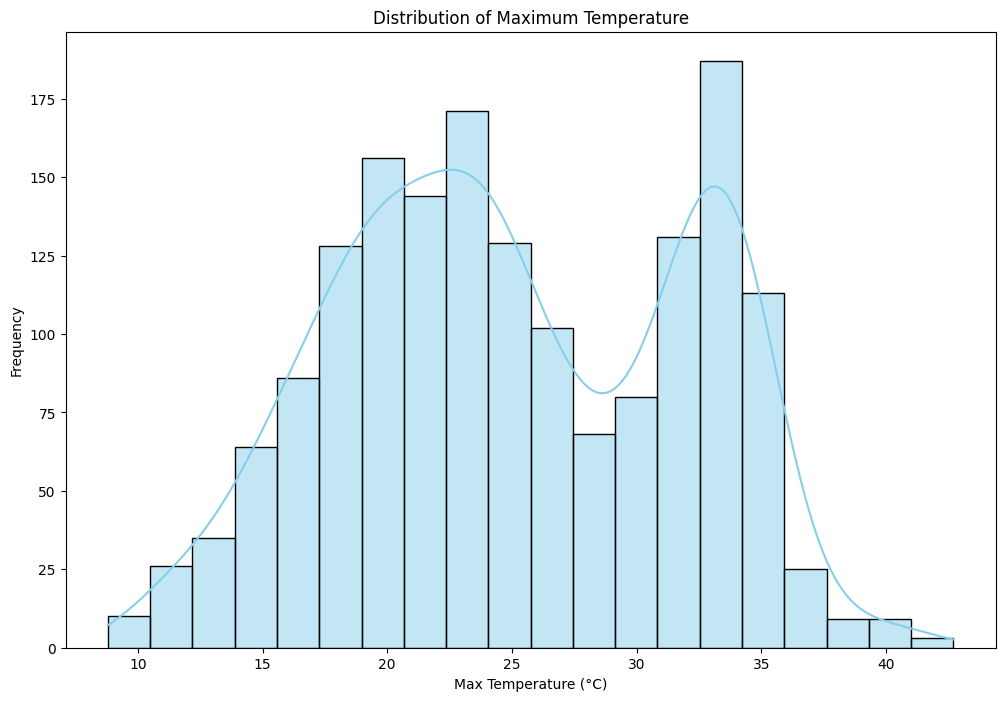

In [9]:
# Visualize the distribution of temperature, rainfall, ....
plt.figure(figsize=(12, 8))
sns.histplot(df['Max °C'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

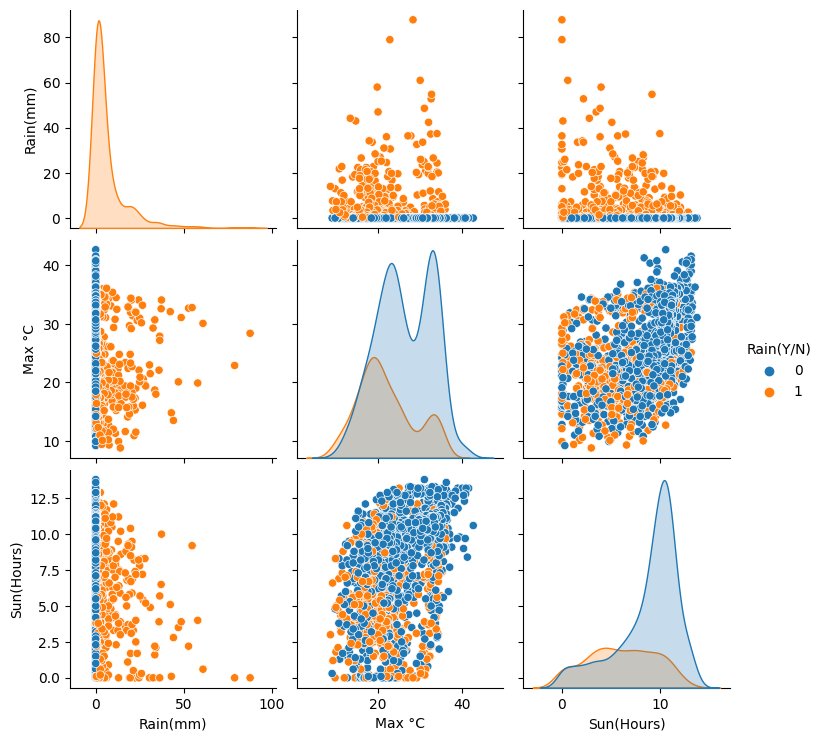

In [10]:
# Let's visualize relationships between variables
sns.pairplot(df[['Rain(mm)', 'Max °C', 'Sun(Hours)', 'Rain(Y/N)']], hue='Rain(Y/N)', diag_kind='kde')
plt.show()

In [11]:
print(df.columns)

Index(['State', 'Station', 'Year', 'Month', 'Date', 'Day', 'Min °C', 'Max °C',
       'Rain(mm)', 'Evap (mm)', 'Sun(Hours)', 'Max Wind gust Dir',
       'Max wind gust Spd - km/h', 'Max wind gust-Time-local',
       'Temp °C- 9:00AM', 'RH -% 9:00AM', 'Cld 8th- 9:00 AM',
       'Dir - 9:00 AM - km/h', 'Spd - 9:00AM - km/h', 'MSLP- hPa - 9:00AM',
       'Temp °C- 3:00PM', 'RH -% 3:00PM', 'Cld 8th- 3:00 PM',
       'Dir - 3:00 PM - km/h', 'Spd - 3:00PM - km/h', 'MSLP- hPa - 3:00PM',
       'Rain(Y/N)'],
      dtype='object')


In [12]:
cloudy_condition = df[df['Cld 8th- 3:00 PM'] == 'Cloudy']
conditional_rain_probability_cloudy = cloudy_condition['Rain(Y/N)'].value_counts(normalize=True).get('Y', 0)
print(f"Probability of Rain given Cloudy Weather: {conditional_rain_probability_cloudy:.2%}")

Probability of Rain given Cloudy Weather: 0.00%


**Future Work**
Explore more advanced machine learning models for improved predictions.
Investigate the impact of other weather parameters on rainfall.
Consider incorporating external factors like geographical features for a comprehensive analysis.